<a href="https://colab.research.google.com/github/tanmy-sharma/Jak2Biotech/blob/main/Second_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-profiling featurewiz feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of lazyt

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures
from featurewiz import FeatureWiz

In [6]:
df_train = pd.read_csv('/content/jak2train.csv')
df_test = pd.read_csv('/content/jak2test.csv')

In [7]:
df_train_copy = df_train
df_test_copy = df_test

In [11]:
fwiz = FeatureWiz(corr_limit = 0.7, verbose = 2)

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (9440, 1615)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E

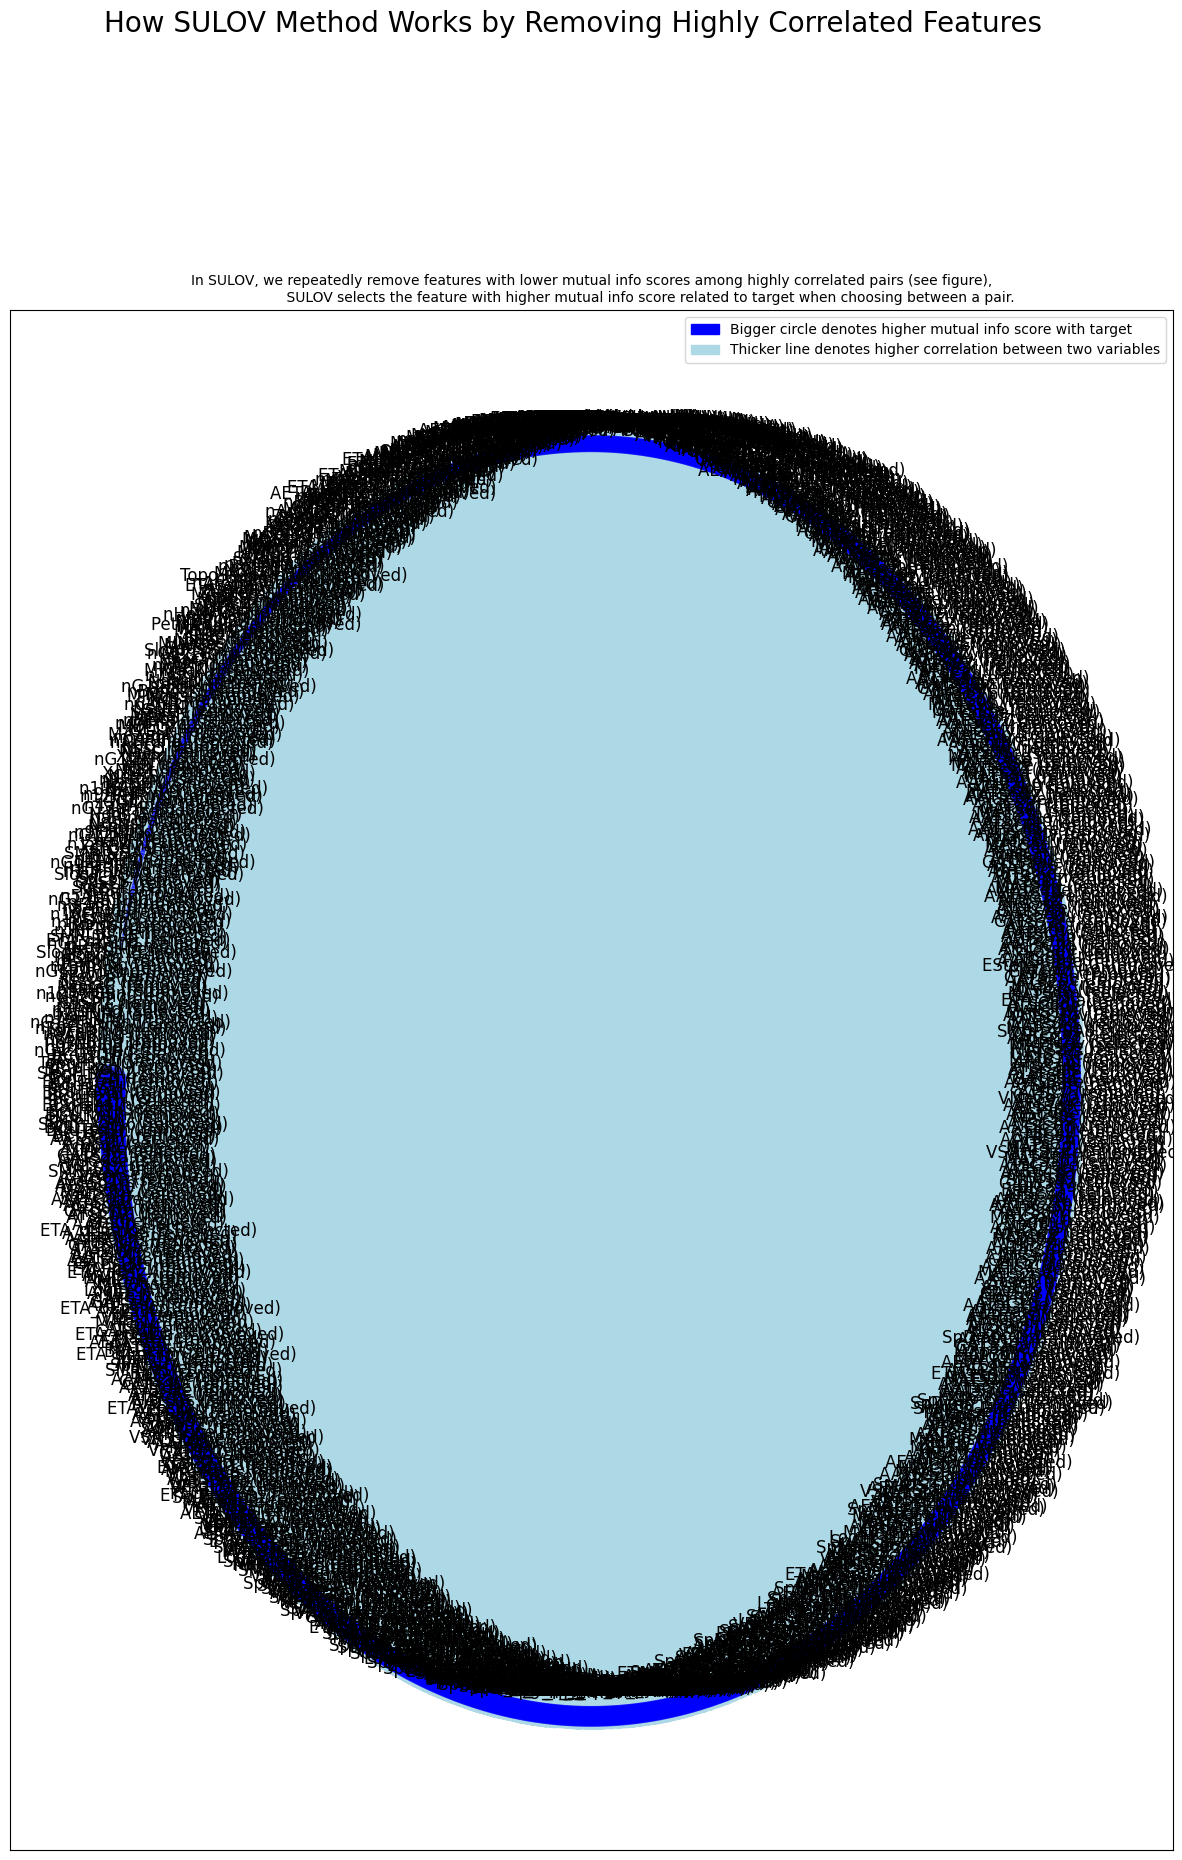

Time taken for SULOV method = 199 seconds
    Adding 0 categorical variables to reduced numeric variables  of 356
Finally 356 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 273 features per iteration...
    XGBoost version using 1.7.6 as tree method: gpu_hist
    Number of booster rounds = 100
            Time taken for regular XGBoost feature selection = 55 seconds
            Time taken for regular XGBoost feature selection = 49 seconds
            Time taken for regular XGBoost feature selection = 40 seconds
            Time taken for regular XGBoost feature selection = 20 seconds
            Time taken for regular XGBoost feature selection 

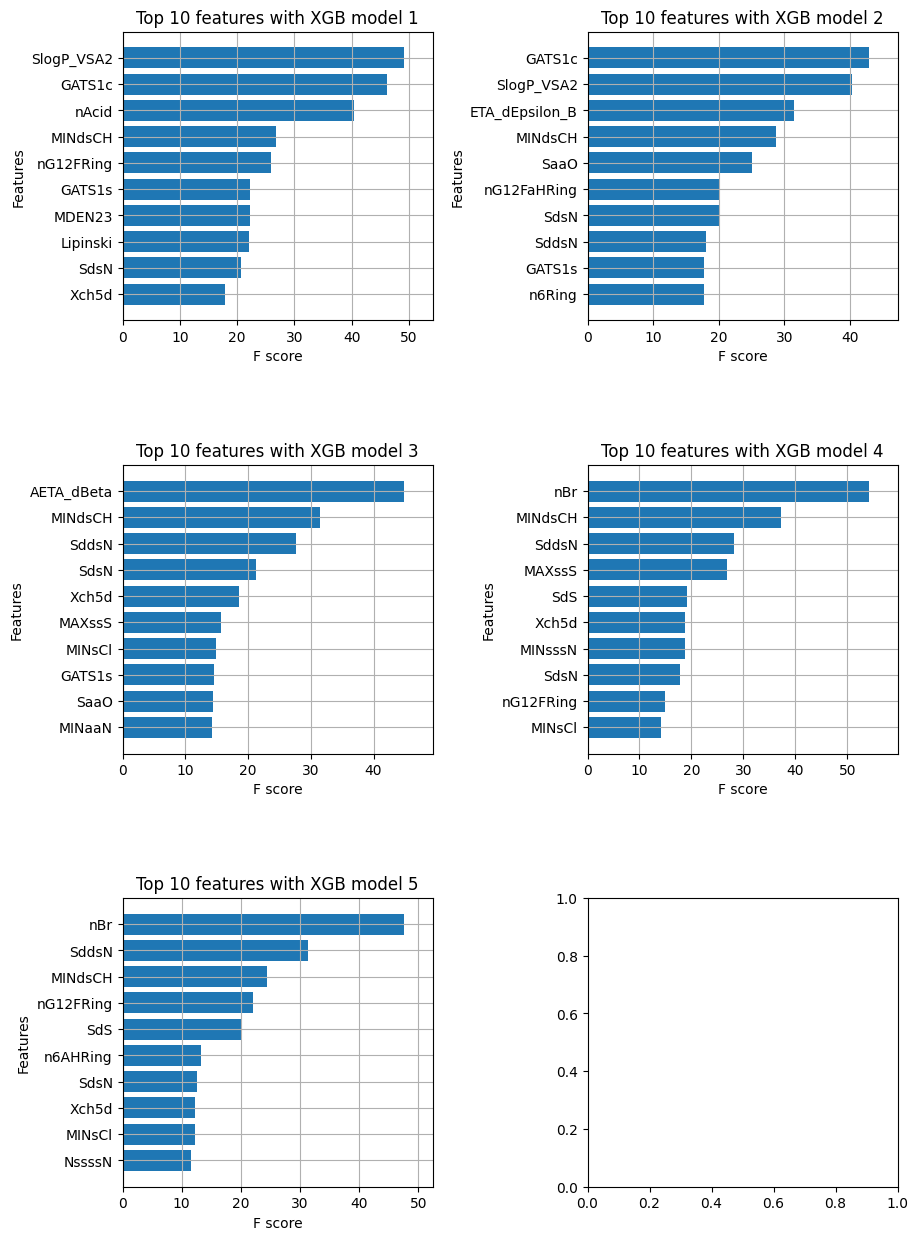

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 297 important features. Too many to print...
Total Time taken for featurewiz selection = 371 seconds
Output contains a list of 297 important features and a train dataframe
    Time taken to create entire pipeline = 382 second(s)


In [17]:
X_train_selecled = fwiz.fit_transform(df_train_copy.drop(['cls'], axis = 1), df_train_copy['cls'])
y_train_selected = fwiz.transform(df_test_copy.drop(['cls'], axis = 1))

In [19]:
X_train_selecled

,GATS1c,SlogP_VSA2,SLogP,MDEN-23,MINdsCH,MINssCH2,GATS1s,GATS2m,SaaO,BCUTZ-1h,...,SdNH,nBr,n7HRing,NssssN,Xch-4d,nG12ARing,n7ARing,NdssS,NdsssP,n12FRing
0,1.465955,11.075833,3.76460,NaN,NaN,NaN,0.743835,0.802168,0.000000,8.028907,...,0.0,0,0,0,0.0,0,0,0,0,0
1,1.809662,30.632859,1.47570,1.519671,NaN,0.598134,0.538339,0.803913,0.000000,8.023867,...,0.0,0,0,0,0.0,0,0,0,0,0
2,1.456171,22.664991,2.75378,NaN,1.366755,0.465849,0.742746,0.885434,0.000000,8.022220,...,0.0,0,0,0,0.0,0,0,0,0,0
3,1.456171,22.664991,2.75378,NaN,1.366755,0.465849,0.742746,0.885434,0.000000,8.022220,...,0.0,0,0,0,0.0,0,0,0,0,0
4,1.001737,5.662860,2.71270,0.632456,NaN,0.867686,0.524510,0.870282,0.000000,8.012315,...,0.0,0,0,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9435,1.542939,27.781441,4.41042,1.216440,NaN,NaN,0.690051,0.662743,0.000000,16.004504,...,0.0,0,0,0,0.0,0,0,0,0,0
9436,1.607400,23.024800,4.98084,0.707107,NaN,0.111446,0.584523,0.799595,5.449994,8.025249,...,0.0,0,0,0,0.0,0,0,0,0,0
9437,1.550834,41.312013,2.76280,NaN,2.028977,-0.229874,0.537848,0.701485,0.000000,8.024933,...,0.0,0,0,0,0.0,0,0,0,0,0
9438,1.426312,32.721317,2.11670,2.555772,NaN,0.037108,0.596461,0.901483,0.000000,16.004503,...,0.0,0,0,0,0.0,0,0,0,0,0


In [20]:
X_test = df_train_copy['cls']
y_test = df_test_copy['cls']

In [21]:
X_test.shape

(9440,)

In [22]:
!pip install xgboost

In [23]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_selecled, X_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(y_train_selected)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  91.94915254237289


In [26]:
param_grid = {
    'max_depth': [4, 5, 6, 8, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [27]:
model = XGBClassifier(objective='binary:logistic')

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_selecled, X_test)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
best_xgb_classifier = XGBClassifier(objective='binary:logistic', **best_params)
best_xgb_classifier.fit(X_train_selecled, X_test)

In [ ]:
y_pred = best_xgb_classifier.predict(y_train_selected)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)